___
# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
- <Strong> Nombre: </Strong>  <font color="blue"> `Isaac Vazquez` </font>
- <Strong> Fecha </Strong>: 26 de Septiembre del 2025
- <Strong> Correo: </Strong>  <font color="blue"> `isaac.vazquez@iteso.mx` </font>
___


### <font color= #2E9AFE> Tarea 2: Análisis de Regresión Lineal</font>

La tarea consiste en ajustar un modelo de regresión lineal para predecir la variable objetivo, pero no se trata solamente de ejecutar el modelo. La tarea implica varias etapas:

1. **Cargar y explorar el conjunto de datos**
- Haz una exploración inicial al conjunto de datos
- Existen valores nulos? si los hay, justifica una estrategia para tratarlos
- Según la exploración y el significado de las variables, crees que algunas variables se puedan eliminar? De ser ser así, quítalas y sigue con tu análisis (de todos modos guarda los datos originales)
- Divide tus datos en un 80% de entrenamiento y 20% de prueba antes de realizar cualquier pre-procesamiento. **De aquí en adelante recuerda lo que vimos sobre el data leakage.**

2. **Preprocesamiento de los datos**
- Crea variables dummy para las variables categóricas (revisa que estén convertidas a tipo de dato "category" primero)
- Visualiza Variables numéricas, cómo se relacionan con tu variable a predecir (con los datos del train)
- Visualiza Variables categóricas (diagrama de caja de todas las variables categóricas antes de crear los dummies) contra la variable objetivo
- Qué observas de los gráficos anteriores? hay variables que pueden ser buenos/malos predictores?
- Revisa si hay alta correlación entre las variables
- Escala las variables predictoras (sólo las variables numéricas)
- Realiza una selección de características utilizando algún método (puedes sugerir algún método como correlación, RFE, etc.).

3. **Detección de multicolinealidad**
- Calcula el VIF (Variance Inflation Factor) para detectar multicolinealidad entre las variables independientes (esto no lo vimos, pero te pido buscar la interpretación del VIF en internet). Puedes basarte en este código:


In [20]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#vif = pd.DataFrame()
#vif['Features'] = X_train_seleccionadas.columns
#vif['VIF'] = [variance_inflation_factor(X_train_seleccionadas.values, i) for i in range(X_train_seleccionadas.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
#vif = vif.sort_values(by = "VIF", ascending = False)
#vif

- Si detectas multicolinealidad, realiza la eliminación de variables y justifica por qué las variables eliminadas son redundantes.

4. **Entrenamiento y validación del modelo**

- Entrena el modelo utilizando regresión lineal y evalúa su rendimiento en el conjunto de entrenamiento y prueba.
- Implementa cross-validation y reporta las métricas promedio (RMSE, MAE, R²).
- Visualiza la curva de aprendizaje
- El modelo está haciendo overfittint/underfitting?
  
5. **Interpretación de los coeficientes**

*NOTA: Esto no lo vimos en clase, por lo tanto te tocará investigar cómo interpretar los coeficientes. Interpretar los coeficientes es de suma importancia para poder explicar tu modelo*

- Interpreta los coeficientes del modelo final (model.coef_) y discute cuáles son las variables más importantes para predecir la variable objetivo.
- ¿Cómo afectan los signos y magnitudes de los coeficientes a la interpretación del modelo?

6. **Mejora del modelo**

- Si el modelo presenta un mal ajuste, propón al menos formas de mejorarlo.
- Evalúa si las mejoras introducidas realmente generan un mejor desempeño del modelo.

7. **Verificación de las suposiciones del modelo**

- Revisa los residuales se distribuyen normalmente con media cero.
- Existió relación lineal entre las X y Y?
- Con tu modelo final, existe multicolinealidad en tus variables independientes?


# Renta de bicicletas

Este conjunto de datos contiene recuentos diarios de bicicletas rentadas de una empresa en Washington, D.C.

Se tienen las siguientes variables:
- Conteo de bicicletas rentadas --> target (cnt).
- Fecha (dteday)
- La temporada. Ya sea primavera, verano, otoño o invierno (season).
- Year (yr)
- Mes (mnth)
- Hora (hr)
- Indicador de si el día era festivo o no (holiday).
- Día de la semana (weekday)
- Indicador de si el día fue entre semana o fin de semana (workingday).
- La situación meteorológica ese día. 1=despejado, 2=Pocas nubes, 3=Parcialmente nublado, 4=Nublado (weathersit).
- Temperatura en grados Celsius (temp).
- Temperatura normalizada en Celsius. Los valores estan calculaods como (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (atemp)
- Humedad relativa en porcentaje (hum).
- Velocidad del viento en km por hora (windspeed).


In [21]:
# pip install pandas seaborn matplotlib ucimlrepo

### 0. Preparacion de datos

In [22]:
# Importar librerias externas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score


# ----- Descargar y preparar datos -----
bike_sharing = fetch_ucirepo(id=275)
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
df_original = pd.concat([X, y], axis=1)
df = df_original.copy()
#---------------------------------

# Imprimir los primeros 5 registros del dataset
print(df.head())

       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  cnt  
0  0.24  0.2879  0.81        0.0   16  
1  0.22  0.2727  0.80        0.0   40  
2  0.22  0.2727  0.80        0.0   32  
3  0.24  0.2879  0.75        0.0   13  
4  0.24  0.2879  0.75        0.0    1  


### 1.1 Exploracion de datos

In [23]:
# Checar los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 1.9+ MB


In [24]:
# Check los valores nulos por columna
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

- No tenemos ningun valor nulo, por lo que no es necesario limpiar el dataset.

### 1.2 Eliminacion de variables

Basados en la exploracion de datos, podemos eliminar las siguientes variables:
  - dteday, porque ya hay otras variables que describen la fecha.
  - atemp, ya existe temp y es mas dificil de interpretar.

In [25]:
# Eliminar columns
df = df.drop(['dteday', 'atemp'], axis=1)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


### 1.3 Train/Test Split

-  Nuestra variable objetivo es "cnt"

In [26]:
# Convertir a categorias
cat_vars = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in cat_vars:
    df[col] = df[col].astype('category')

# Separar las variables predictoras 'x', del objetivo 'y'.
X = df.drop('cnt', axis=1)
y = df['cnt']

# 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Numero de registros para entrenamiento y pruebas
print(f"train: {X_train.shape[0]}, test: {X_test.shape[0]}")

train: 13903, test: 3476


### 2.1 Visualizacion de Variables

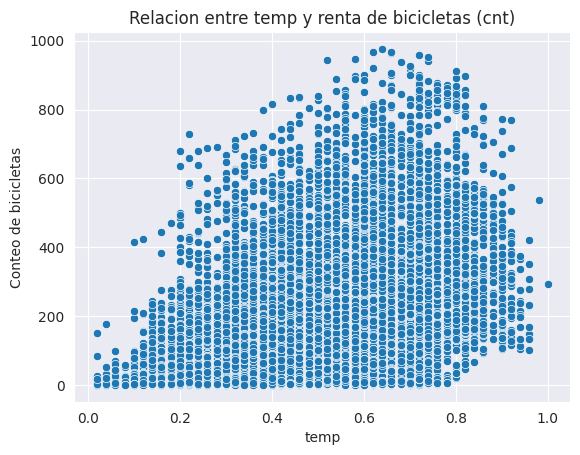

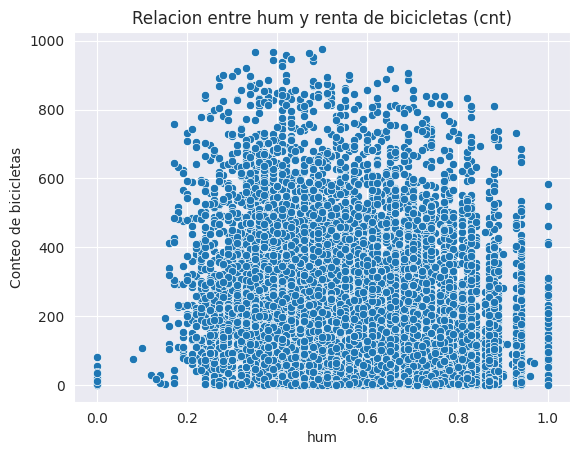

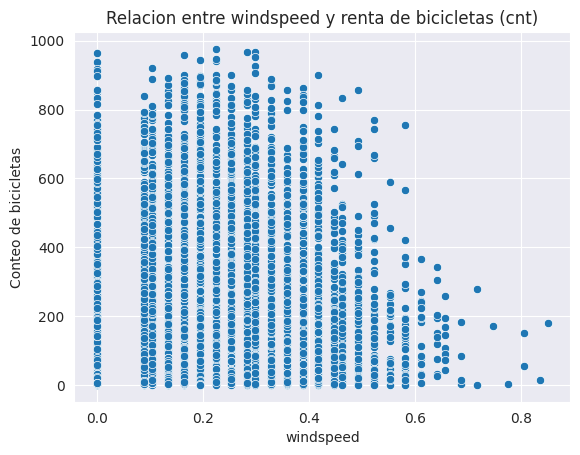

In [27]:
# Variables numericas
num_vars = ['temp', 'hum', 'windspeed']

for var in num_vars:
    sns.scatterplot(x=X_train[var], y=y_train)
    plt.title(f'Relacion entre {var} y renta de bicicletas (cnt)')
    plt.ylabel('Conteo de bicicletas')
    plt.show()

 Observaciones:
- temp: A mayor temperatura mas rentas de bicicletas (tendencia positiva), Es un buen predictor
- hum: No hay una tendencia clara, No es buen predictor
- windspeed: A menor velocidad del viento mas rentas de bicicletas (tendencia negativa), Es un buen predictor

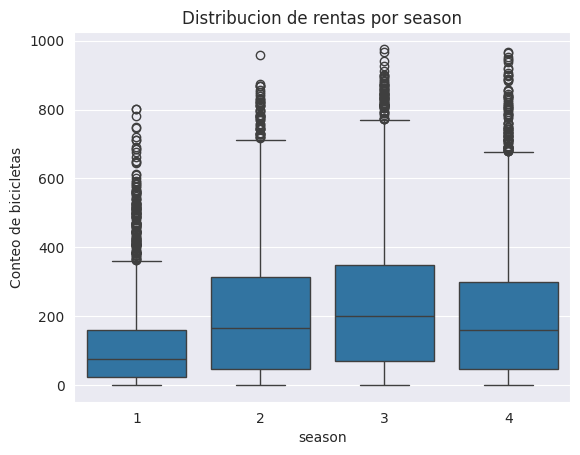

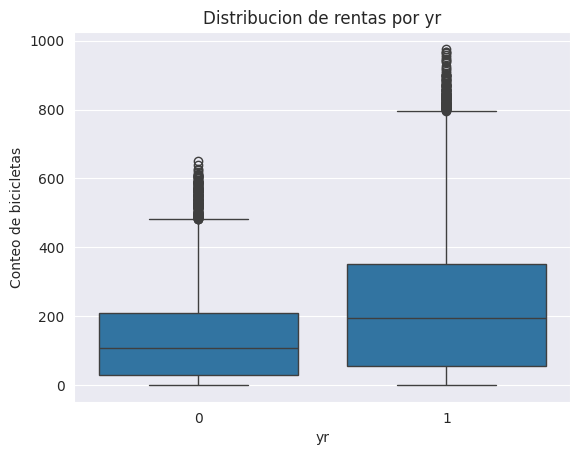

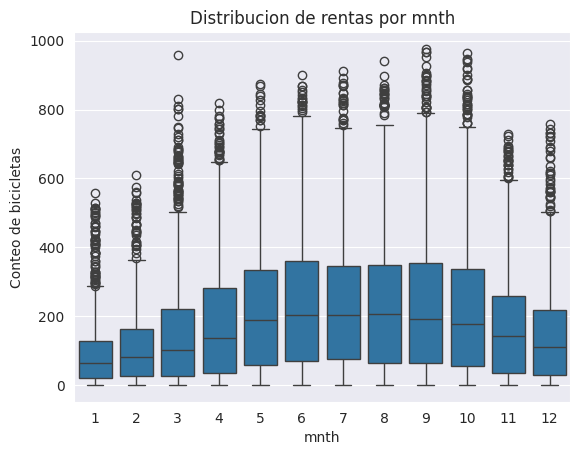

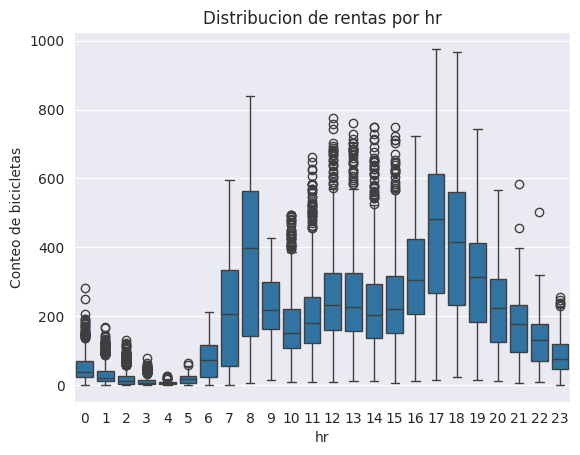

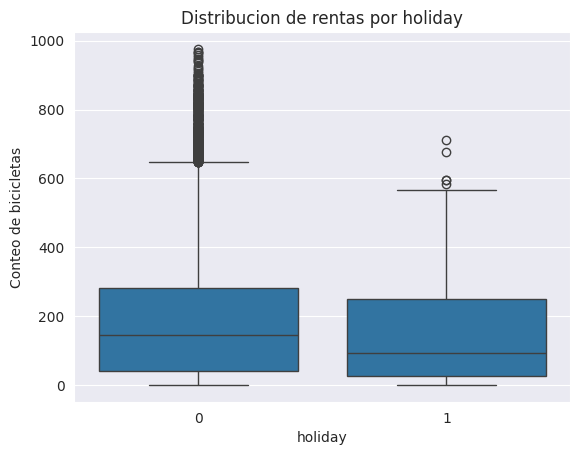

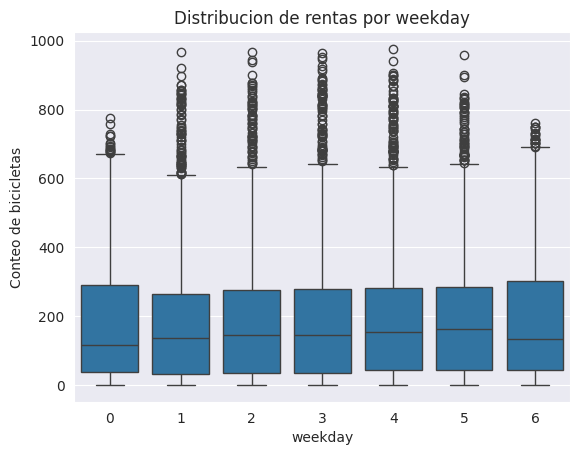

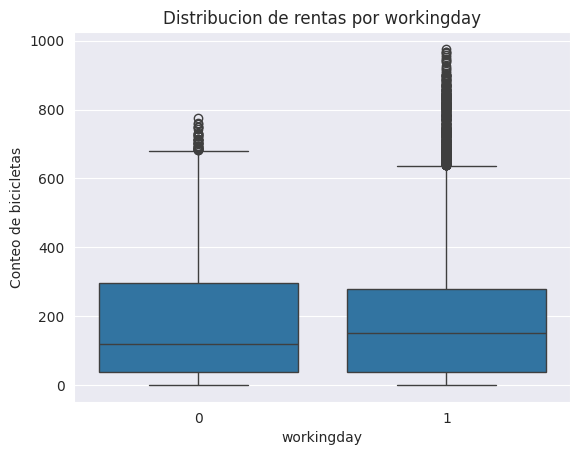

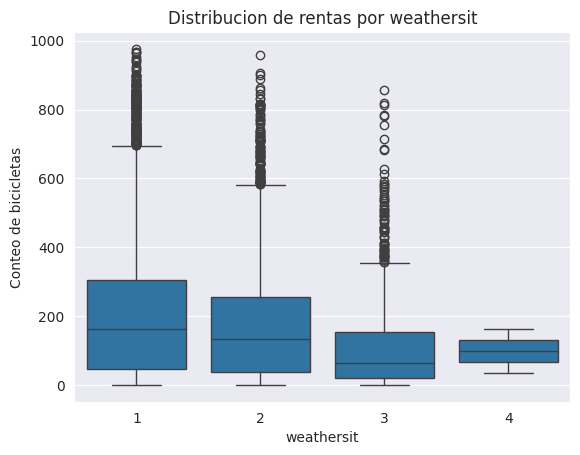

In [28]:
# Variables categoricas
cat_vars = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

for var in cat_vars:
    sns.boxplot(x=X_train[var], y=y_train)
    plt.title(f"Distribucion de rentas por {var}")
    plt.ylabel('Conteo de bicicletas')
    plt.show()

 Observaciones:
- season: Durante Primavera(2) y Verano(3) es donde hay mas rentas, es un buen predictor
- yr: Hay mas rentas en el year 1, que el year 0, lo cual es un incremento
- mth: Al igual que season, durante los meses entre Mayo y Septiembre hay mas rentas
- hr: A las 8:00am hay un pico y tambien a las 5:00pm, que puede ver con la entrada y salida a la escuela o trabajo, es un buen predictor
- holiday: Hay menor renta en dias festivos
- weekday: Los fines de semana tienen una distribucion mas plana
- workingday: Lo mismo que weekday
- weathersit: El clima 1 tiene mucha mas rentas (despejado) y el clima 4 (nublado) casi no, es un buen predictor

### 2.2 Creacion de variables dummy

In [29]:
# Crear variables dummy
X_train = pd.get_dummies(X_train, columns=cat_vars, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_vars, drop_first=True)

# Alinear columnas
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Dimensiones de X_train con dummies
print(X_train.shape)

(13903, 52)


### 2.3 Escalado de variables predictoras

In [30]:
# Columnas a escalar
cols_to_scale = ['temp', 'hum', 'windspeed']

# Crear escalador
scaler =  StandardScaler()

# Ajustar y Escalar
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# Escalar datos de pruebas
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Datos despues de escalado
print(X_train[cols_to_scale].head())

          temp       hum  windspeed
335  -1.540837 -0.399449   0.278669
7035  0.117112 -1.073743  -0.697714
8051 -0.193753  1.934646   0.278669
2133 -0.193753 -1.644299  -1.552252
8485 -1.540837  0.637926  -0.697714


### 2.4 Seleccion de Caracteristicas - RFE

In [31]:
# Modelo RFE
rfe_model = LinearRegression()
rfe = RFE(estimator=rfe_model, n_features_to_select=20, step=1)
rfe.fit(X_train, y_train)

# Filtrar dataframe
selected_cols = X_train.columns[rfe.support_]
X_train_selected = X_train[selected_cols]
X_test_selected = X_test[selected_cols]

print(selected_cols)

Index(['yr_1', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23', 'weathersit_3', 'weathersit_4'],
      dtype='object')


- No esperaba que seleccionara tantas variables de hora

### 3. Detectar Multicolinealidad - VIF

In [32]:
# Convertir datos a numericos
X_train_selected = X_train_selected.astype(float)

# Constante
X_train_with_const = add_constant(X_train_selected)

# Dataframe VIF
vif = pd.DataFrame()
vif['Features'] = X_train_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif = vif[vif['Features'] != 'const']

print(vif)

        Features   VIF
4           hr_9  1.10
3           hr_8  1.10
6          hr_11  1.10
5          hr_10  1.10
13         hr_18  1.10
14         hr_19  1.10
7          hr_12  1.10
8          hr_13  1.10
9          hr_14  1.10
10         hr_15  1.10
11         hr_16  1.10
12         hr_17  1.10
17         hr_22  1.10
18         hr_23  1.10
15         hr_20  1.10
16         hr_21  1.10
2           hr_7  1.09
1           yr_1  1.00
19  weathersit_3  1.00
20  weathersit_4  1.00


- Todos los VIF son debajo de 5, por lo que hay baja multicolinealidad que es ideal, no es necesario eliminar ninguna variable

### 4.1 Entrenamiento y Evaluacion

In [33]:
# Crear y entrenar el modelo final
modelo_final = LinearRegression()
modelo_final.fit(X_train_selected, y_train)

# Preddicion
y_pred = modelo_final.predict(X_test_selected)

# Evaluacion
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"MAE: {mae:.4f}")

RMSE: 117.0369
R^2: 0.5674
MAE: 86.4183


In [34]:
print(f"Rango de rentas (cnt): {y.min()} - {y.max()}")
print(f"Promedio de rentas: {y.mean():.2f}")
print(f"Desviacion estandar de rentas: {y.std():.2f}")

Rango de rentas (cnt): 1 - 977
Promedio de rentas: 189.46
Desviacion estandar de rentas: 181.39


- RMSE: 117.0369, error relativo de 61.8% (117/189), rendimiento regular
- R^2: 0.5674, explica 56% de variable
- MAE: 86.4183, error relativo 45%, el modelo se equivoca por 86 bicicletas en promedio

### 4.2 Cross-Validation

In [35]:
scores_r2 = cross_val_score(modelo_final, X_train_selected, y_train, cv=5, scoring='r2')

print(f"\nR^2 promedio con Cross-Validation (5 folds): {scores_r2.mean():.4f}")


R^2 promedio con Cross-Validation (5 folds): 0.5799


- El modelo es consisttene con el 58% de variabilidad

- El modelo no esta 

### 5.1 Interpretacion de coeficientes

In [36]:
# Coeficientes
coeficientes = pd.DataFrame({
    'Variable': X_train_selected.columns,
    'Coeficiente': modelo_final.coef_
}).sort_values('Coeficiente', ascending=False)

print(coeficientes)

        Variable  Coeficiente
11         hr_17   438.218566
12         hr_18   392.185943
2           hr_8   333.365440
10         hr_16   282.603955
13         hr_19   280.033384
7          hr_13   226.380967
6          hr_12   224.033047
9          hr_15   218.894716
8          hr_14   205.563230
14         hr_20   198.521289
3           hr_9   189.157140
1           hr_7   184.384859
5          hr_11   176.011212
4          hr_10   145.100232
15         hr_21   143.571966
16         hr_22   100.260576
0           yr_1    91.218420
17         hr_23    58.258795
18  weathersit_3   -88.242997
19  weathersit_4  -275.735602


- hr_17 (5 PM): +438 bicicletas - hora pico de salida
- hr_8 (8 AM): +333 bicicletas - hora pico de entrada
- yr_1: +91 bicicletas - incremento anual
- weathersit_4: -276 bicicletas - mal clima
- weathersit_3: -88 bicicletas - clima regular

Patron: Las horas de entrada y salidad aumentan las rentas y el mal clima las reduce.

### 6.1 Mejorar el Modelo

- El modelo lo veo bien, por lo que no seria necesario mejoararlo, aunque podria transformar la variable objetivo para que cumpla mejor con la homocedasticidad

### 7.1 Normalidad de los Residuos

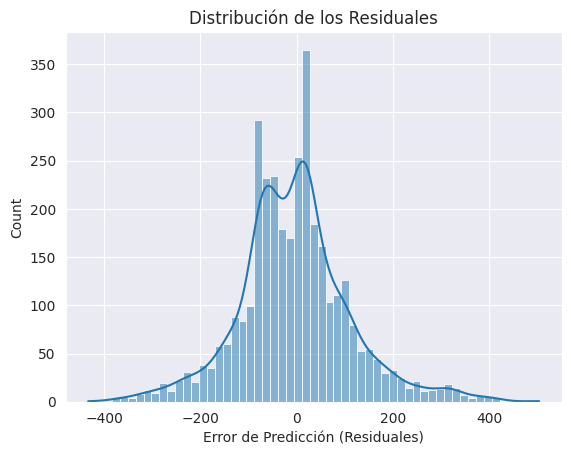


Media de residuales: -4.78


In [37]:
# Residuales
residuales = y_test - y_pred

# Histograma
sns.histplot(residuales, kde=True)
plt.title('Distribución de los Residuales')
plt.xlabel('Error de Predicción (Residuales)')
plt.show()

print(f"\nMedia de residuales: {residuales.mean():.2f}")

- La distribucion es como una campana de Gauss, por lo cual esta bien

### 7.2 Relacion Lineal

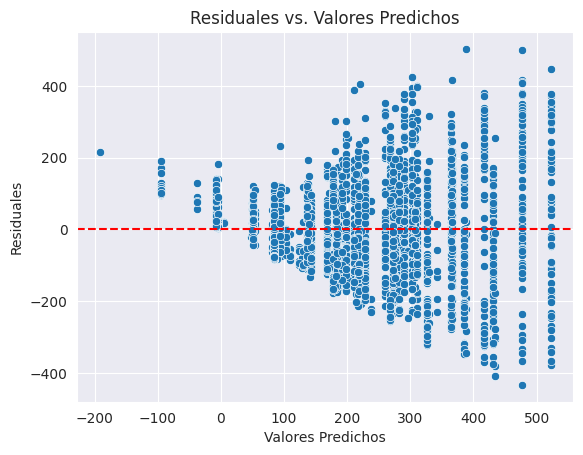

In [38]:
sns.scatterplot(x=y_pred, y=residuales)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuales vs. Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.show()

- Creo que no cumple con el principio de Homocedasticidad, se ve como una piramide o embudo, el error no es constan